In [1]:
!pip install numpy 
!pip install pandas 
!pip install tensorflow
!pip install matplotlib
!pip install keras
!pip install keras

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26

In [4]:
!pip install scikit-learn

In [5]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [6]:
data=pd.read_csv(r"C:\Users\adala\Downloads\stock.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7160 non-null   object 
 1   Open       7160 non-null   float64
 2   High       7160 non-null   float64
 3   Low        7160 non-null   float64
 4   Close      7160 non-null   float64
 5   Adj Close  7160 non-null   float64
 6   Volume     7160 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 391.7+ KB


In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-11-1994,8.3125,8.3125,8.1875,8.2500,6.565471,2176400
1,02-11-1994,8.2500,8.2500,8.1875,8.1875,6.515731,2348200
2,03-11-1994,8.1875,8.2500,8.1250,8.1875,6.515731,2060800
3,04-11-1994,8.1875,8.2500,8.1250,8.1250,6.465993,2663800
4,07-11-1994,8.0625,8.0625,8.0000,8.0625,6.416255,1049400


In [9]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()

In [10]:
trainData=data.iloc[:,4:5].values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7160 non-null   object 
 1   Open       7160 non-null   float64
 2   High       7160 non-null   float64
 3   Low        7160 non-null   float64
 4   Close      7160 non-null   float64
 5   Adj Close  7160 non-null   float64
 6   Volume     7160 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 391.7+ KB


In [11]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(7160, 1)

In [12]:
X_train=[]
Y_train=[]

for i in range (60,1149):
    X_train.append(trainData[i-60:i,0])
    Y_train.append(trainData[i,0])

X_train,Y_train=np.array(X_train),np.array(Y_train)

In [13]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [14]:
model=Sequential()
model.add(LSTM(units=100,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss="mean_squared_error")

In [15]:
hist=model.fit(X_train,Y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
35/35 - 27s - loss: 6.2381e-05 - 27s/epoch - 768ms/step
Epoch 2/20
35/35 - 7s - loss: 1.9139e-05 - 7s/epoch - 208ms/step
Epoch 3/20
35/35 - 7s - loss: 9.3465e-06 - 7s/epoch - 207ms/step
Epoch 4/20
35/35 - 7s - loss: 5.5527e-06 - 7s/epoch - 197ms/step
Epoch 5/20
35/35 - 7s - loss: 3.1139e-06 - 7s/epoch - 208ms/step
Epoch 6/20
35/35 - 7s - loss: 4.5547e-06 - 7s/epoch - 201ms/step
Epoch 7/20
35/35 - 8s - loss: 2.8858e-06 - 8s/epoch - 219ms/step
Epoch 8/20
35/35 - 6s - loss: 2.2637e-06 - 6s/epoch - 179ms/step
Epoch 9/20
35/35 - 7s - loss: 9.3323e-06 - 7s/epoch - 190ms/step
Epoch 10/20
35/35 - 7s - loss: 3.3485e-06 - 7s/epoch - 200ms/step
Epoch 11/20
35/35 - 6s - loss: 2.3401e-06 - 6s/epoch - 181ms/step
Epoch 12/20
35/35 - 7s - loss: 2.8485e-06 - 7s/epoch - 196ms/step
Epoch 13/20
35/35 - 7s - loss: 2.2153e-06 - 7s/epoch - 187ms/step
Epoch 14/20
35/35 - 7s - loss: 2.2902e-06 - 7s/epoch - 192ms/step
Epoch 15/20
35/35 - 7s - loss: 4.1338e-06 - 7s/epoch - 189ms/step
Epoch 16/20
35/35

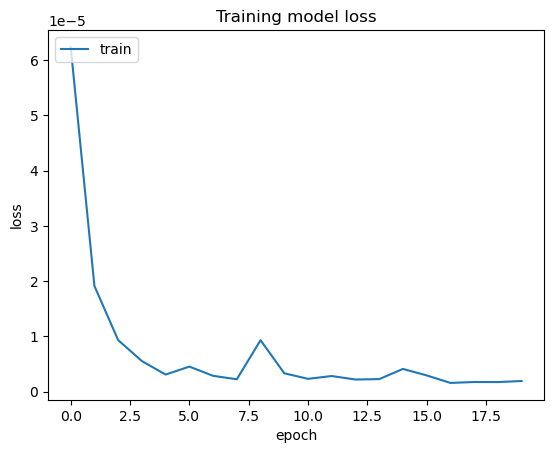

In [16]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [17]:
testData=pd.read_csv(r"C:\Users\adala\Downloads\stock.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData=testData.dropna()
testData=testData.iloc[:,4:5]
Y_test=testData.iloc[60:,0:].values
#VALUES 
inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length = len(testData)
time=60
for i in range(time,length):
    X_test.append(inputClosing_scaled[i-time:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(7100, 60, 1)

In [18]:
y_pred=model.predict(X_test)
y_pred

222/222 [==============================] - 26s 103ms/step


array([[0.00176845],
       [0.00171086],
       [0.00163534],
       ...,
       [0.5716948 ],
       [0.57292515],
       [0.574115  ]], dtype=float32)

In [19]:
predicted_price = sc.inverse_transform(y_pred)

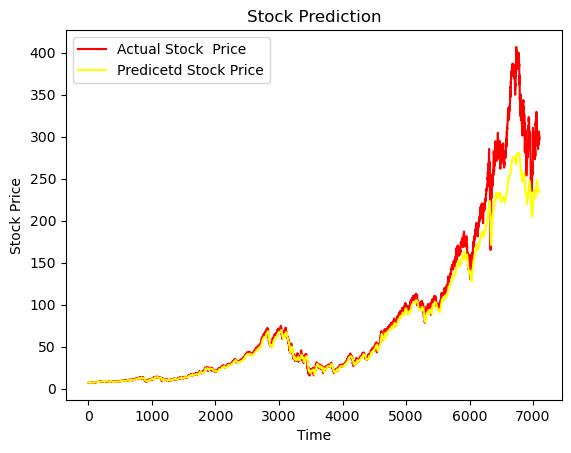

In [20]:
plt.plot(Y_test,color='red',label='Actual Stock  Price')
plt.plot(predicted_price,color='yellow',label='Predicetd Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()